In [1]:
%pylab inline

import tensorflow as tf
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
tf_records_input = ['/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/test_frames/train-00000-of-00004',
                    '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/test_frames/train-00001-of-00004',
                    '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/test_frames/train-00002-of-00004',
                    '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/test_frames/train-00003-of-00004']

# tf_records_input = ['/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/second_half_buffalo_zebra/train-00000-of-00004',
#                    '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/second_half_buffalo_zebra/train-00001-of-00004',
#                    '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/second_half_buffalo_zebra/train-00002-of-00004',
#                    '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames_tf_records/second_half_buffalo_zebra/train-00003-of-00004',]

In [3]:
# tf_record_file = tf.placeholder(tf.string, shape=[None], name='input_files')
tf_record_file = tf.constant(tf_records_input)
dataset = tf.data.TFRecordDataset(tf_record_file)

In [4]:
def _parse_tf_record(example_proto):
    features = {
      'image/height': tf.FixedLenFeature((), tf.int64),
      'image/width': tf.FixedLenFeature((), tf.int64),
      'image/colorspace': tf.FixedLenFeature((), tf.string),
      'image/channels': tf.FixedLenFeature((), tf.int64),
      'image/format': tf.FixedLenFeature((), tf.string),
      'image/filename':tf.FixedLenFeature((), tf.string),
      'image/encoded': tf.FixedLenFeature([], tf.string)}
    parsed_features = tf.parse_single_example(example_proto, features)
#     parsed_features['image'] = tf.decode_raw(parsed_features['image/encoded'], tf.uint8)
    parsed_features['image'] = tf.image.decode_jpeg(parsed_features['image/encoded'], channels=3, ratio=2)
    image_shape = tf.stack([parsed_features['image/height'], parsed_features['image/width'], parsed_features['image/channels']])
    return (parsed_features['image'])

In [5]:
dataset = dataset.map(_parse_tf_record, num_parallel_calls=8)
dataset = dataset.batch(4)
dataset = dataset.prefetch(1)


In [6]:
iterator = dataset.make_one_shot_iterator()

In [8]:
next_element = iterator.get_next(name='my_get_next')
print('next_element:', next_element)
processed = tf.divide(next_element, tf.constant(2, dtype=tf.uint8))
processed = tf.image.rgb_to_grayscale(processed, name='final_image')

image = next_element[3]
# image = next_element

next_element: Tensor("my_get_next:0", shape=(?, ?, ?, 3), dtype=uint8)


In [9]:
sess = tf.Session()

In [10]:
my_get_next_image = sess.graph.get_tensor_by_name('my_get_next:0')
my_final_image = sess.graph.get_tensor_by_name('final_image:0')

In [11]:
# sess.run(iterator.initializer, feed_dict={filenames_tensor: tf_records_input})

In [12]:
first_result, final_image = sess.run([my_get_next_image, my_final_image])

first_result type: uint8
gray_image: float32
gray_image test: float32
(1080, 2048, 1)
gray_image: float32


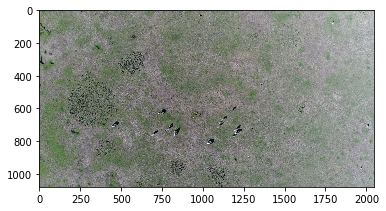

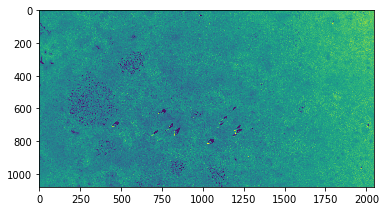

In [14]:
plt.imshow(first_result[0])
print('first_result type:', first_result.dtype)
plt.figure()

gray_image = final_image[0]
print('gray_image:', gray_image.dtype)
print('gray_image test:', gray_image.dtype)
print(gray_image.shape)
print('gray_image:', gray_image.dtype)
plt.imshow(gray_image[:,:,0])


In [16]:
import time
count = 0

t0 = time.time()

while True:
    try:
        result = sess.run(next_element)
    except tf.errors.OutOfRangeError:
        print('finshed')
        break
    if count % 10 == 0: 
        print(count)
    count += 1
print(time.time() - t0)
print(count * 4, 'images')
sess.close()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
finshed
46.87989568710327
1232 images


In [11]:
sess.close()